# Gold Reserves Accumulation Analysis Plan

## Major Assumptions
This analysis uses historical gold reserves data spanning 2002-2022 (20-year period) to identify accumulation patterns. We assume the dataset contains official central bank reserves measured in tonnes, with data quality sufficient for trend analysis despite potential missing values. Accumulation pace will be measured using both absolute changes (total tonnes added) and relative metrics (CAGR and percentage change) to capture different accumulation strategies—recognizing that emerging economies may show higher growth rates while established holders dominate absolute volumes.

## Plan
- [x] Collect and prepare gold reserves dataset
  - [x] Load and validate multi-year country-level reserves data (2002-2022)
  - [x] Clean numeric columns and assess data completeness
- [x] Calculate accumulation metrics for each country
  - [x] Compute absolute change (2022 reserves minus 2002 reserves) and total accumulation over period
  - [x] Calculate CAGR and percentage change for relative growth comparison
- [x] Identify and visualize fastest and slowest accumulators
  - [x] Create comparative visualizations showing top 10-15 accumulators by absolute change and by CAGR
  - [x] Visualize bottom 10 reducers to contrast accumulation vs. depletion strategies
- [x] Analyze patterns and generate insights
  - [x] Examine regional/economic patterns distinguishing aggressive accumulators from reducers
  - [x] Summarize key findings on global gold reserve accumulation strategies and trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the gold reserves dataset
df = pd.read_csv('data/gold reserves by country from 2002 to end of 2022.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset Shape: (96, 22)

First few rows:
                    country      2022      2021      2020      2019      2018  \
0  United States of America  8,133.46  8,133.47  8,133.46  8,133.46  8,133.46   
1                   Germany  3,355.14  3,359.09  3,362.45  3,366.49  3,369.72   
2                     Italy  2,451.84  2,451.84  2,451.84  2,451.84  2,451.84   
3                    France  2,436.75  2,436.47  2,436.19  2,436.00  2,436.03   
4                    Russia  2,298.53  2,301.64  2,298.53  2,271.16  2,113.03   

       2017      2016      2015      2014  ...      2011      2010      2009  \
0  8,133.46  8,133.46  8,133.46  8,133.46  ...  8,133.46  8,133.46  8,133.46   
1  3,373.64  3,377.93  3,380.98  3,384.18  ...  3,396.28  3,400.95  3,406.77   
2  2,451.84  2,451.84  2,451.84  2,451.84  ...  2,451.84  2,451.84  2,451.84   
3  2,436.00  2,435.84  2,435.62  2,435.37  ...  2,435.40  2,435.40  2,435.40   
4  1,838.76  1,615.22  1,414.54  1,208.18  ...    882.95    788.61    64

## Data Overview

The dataset contains gold reserves data for **96 countries** spanning from **2002 to 2022** (21 years). 

**Key observations:**
- All year columns are stored as objects (strings) due to comma formatting in the numbers (e.g., "8,133.46")
- We need to convert these to numeric values for calculations
- Some countries like the USA and Italy show minimal changes, while Russia shows significant accumulation

In [2]:
# Clean the data - convert all year columns from string to numeric
year_columns = [str(year) for year in range(2002, 2023)]

# Create a copy and convert all year columns to numeric
df_clean = df.copy()
for col in year_columns:
    df_clean[col] = df_clean[col].str.replace(',', '').astype(float)

# Check for missing values
print("Missing values per column:")
print(df_clean.isnull().sum())
print("\nCleaned data sample:")
print(df_clean.head())

Missing values per column:
country    0
2022       0
2021       4
2020       4
2019       4
2018       4
2017       4
2016       4
2015       4
2014       4
2013       4
2012       4
2011       4
2010       4
2009       4
2008       4
2007       4
2006       4
2005       4
2004       4
2003       4
2002       4
dtype: int64

Cleaned data sample:
                    country     2022     2021     2020     2019     2018  \
0  United States of America  8133.46  8133.47  8133.46  8133.46  8133.46   
1                   Germany  3355.14  3359.09  3362.45  3366.49  3369.72   
2                     Italy  2451.84  2451.84  2451.84  2451.84  2451.84   
3                    France  2436.75  2436.47  2436.19  2436.00  2436.03   
4                    Russia  2298.53  2301.64  2298.53  2271.16  2113.03   

      2017     2016     2015     2014  ...     2011     2010     2009  \
0  8133.46  8133.46  8133.46  8133.46  ...  8133.46  8133.46  8133.46   
1  3373.64  3377.93  3380.98  3384.18  ...  3396.

In [3]:
# Calculate accumulation metrics for each country
# Only include countries with both 2002 and 2022 data

df_metrics = df_clean[['country', '2002', '2022']].copy()
df_metrics = df_metrics.dropna()  # Remove countries with missing data

# Calculate absolute change (tonnes)
df_metrics['absolute_change'] = df_metrics['2022'] - df_metrics['2002']

# Calculate percentage change
df_metrics['percentage_change'] = ((df_metrics['2022'] - df_metrics['2002']) / df_metrics['2002']) * 100

# Calculate CAGR (Compound Annual Growth Rate)
# CAGR = (Ending Value / Beginning Value)^(1/years) - 1
years = 2022 - 2002
df_metrics['CAGR'] = ((df_metrics['2022'] / df_metrics['2002']) ** (1/years) - 1) * 100

# Sort by absolute change
df_metrics_sorted = df_metrics.sort_values('absolute_change', ascending=False)

print(f"Total countries with complete data: {len(df_metrics)}")
print("\n" + "="*80)
print("TOP 10 COUNTRIES BY ABSOLUTE ACCUMULATION (Tonnes Added)")
print("="*80)
print(df_metrics_sorted.head(10).to_string(index=False))

print("\n" + "="*80)
print("BOTTOM 10 COUNTRIES (Largest Reducers)")
print("="*80)
print(df_metrics_sorted.tail(10).to_string(index=False))

Total countries with complete data: 92

TOP 10 COUNTRIES BY ABSOLUTE ACCUMULATION (Tonnes Added)
     country   2002    2022  absolute_change  percentage_change      CAGR
      Russia 387.65 2298.53          1910.88         492.939507  9.307640
       China 599.97 2010.51          1410.54         235.101755  6.232851
       India 357.72  787.40           429.68         120.116292  4.023775
      Turkey 116.10  541.80           425.70         366.666667  8.006611
  Kazakhstan  53.13  351.67           298.54         561.904762  9.910650
  Uzbekistan 170.12  395.94           225.82         132.741594  4.314264
Saudi Arabia 142.96  323.07           180.11         125.986290  4.160752
    Thailand  77.75  244.16           166.41         214.032154  5.888478
      Poland 102.91  228.67           125.76         122.203867  4.072882
        Iraq   5.87  130.32           124.45        2120.102215 16.766604

BOTTOM 10 COUNTRIES (Largest Reducers)
     country    2002    2022  absolute_change  pe

In [4]:
# Sort by CAGR to see fastest relative growth
df_cagr_sorted = df_metrics.sort_values('CAGR', ascending=False)

print("="*80)
print("TOP 10 COUNTRIES BY FASTEST GROWTH RATE (CAGR %)")
print("="*80)
print(df_cagr_sorted.head(10).to_string(index=False))

print("\n" + "="*80)
print("SLOWEST GROWTH RATE (Most Negative CAGR)")
print("="*80)
print(df_cagr_sorted.tail(10).to_string(index=False))

TOP 10 COUNTRIES BY FASTEST GROWTH RATE (CAGR %)
               country  2002   2022  absolute_change  percentage_change      CAGR
            Cabo Verde  0.00   1.00             1.00                inf       inf
Bosnia and Herzegovina  0.00   1.49             1.49                inf       inf
             Argentina  0.28  61.74            61.46       21950.000000 30.969578
                 Qatar  0.60  91.75            91.15       15191.666667 28.594603
                  Oman  0.02   1.88             1.86        9300.000000 25.503660
                 Haiti  0.03   1.80             1.77        5900.000000 22.717800
               Croatia  0.07   1.93             1.86        2657.142857 18.038305
                  Iraq  5.87 130.32           124.45        2120.102215 16.766604
                Mexico  6.99 120.03           113.04        1617.167382 15.276460
               Belarus  6.24  53.64            47.40         759.615385 11.356407

SLOWEST GROWTH RATE (Most Negative CAGR)
    cou

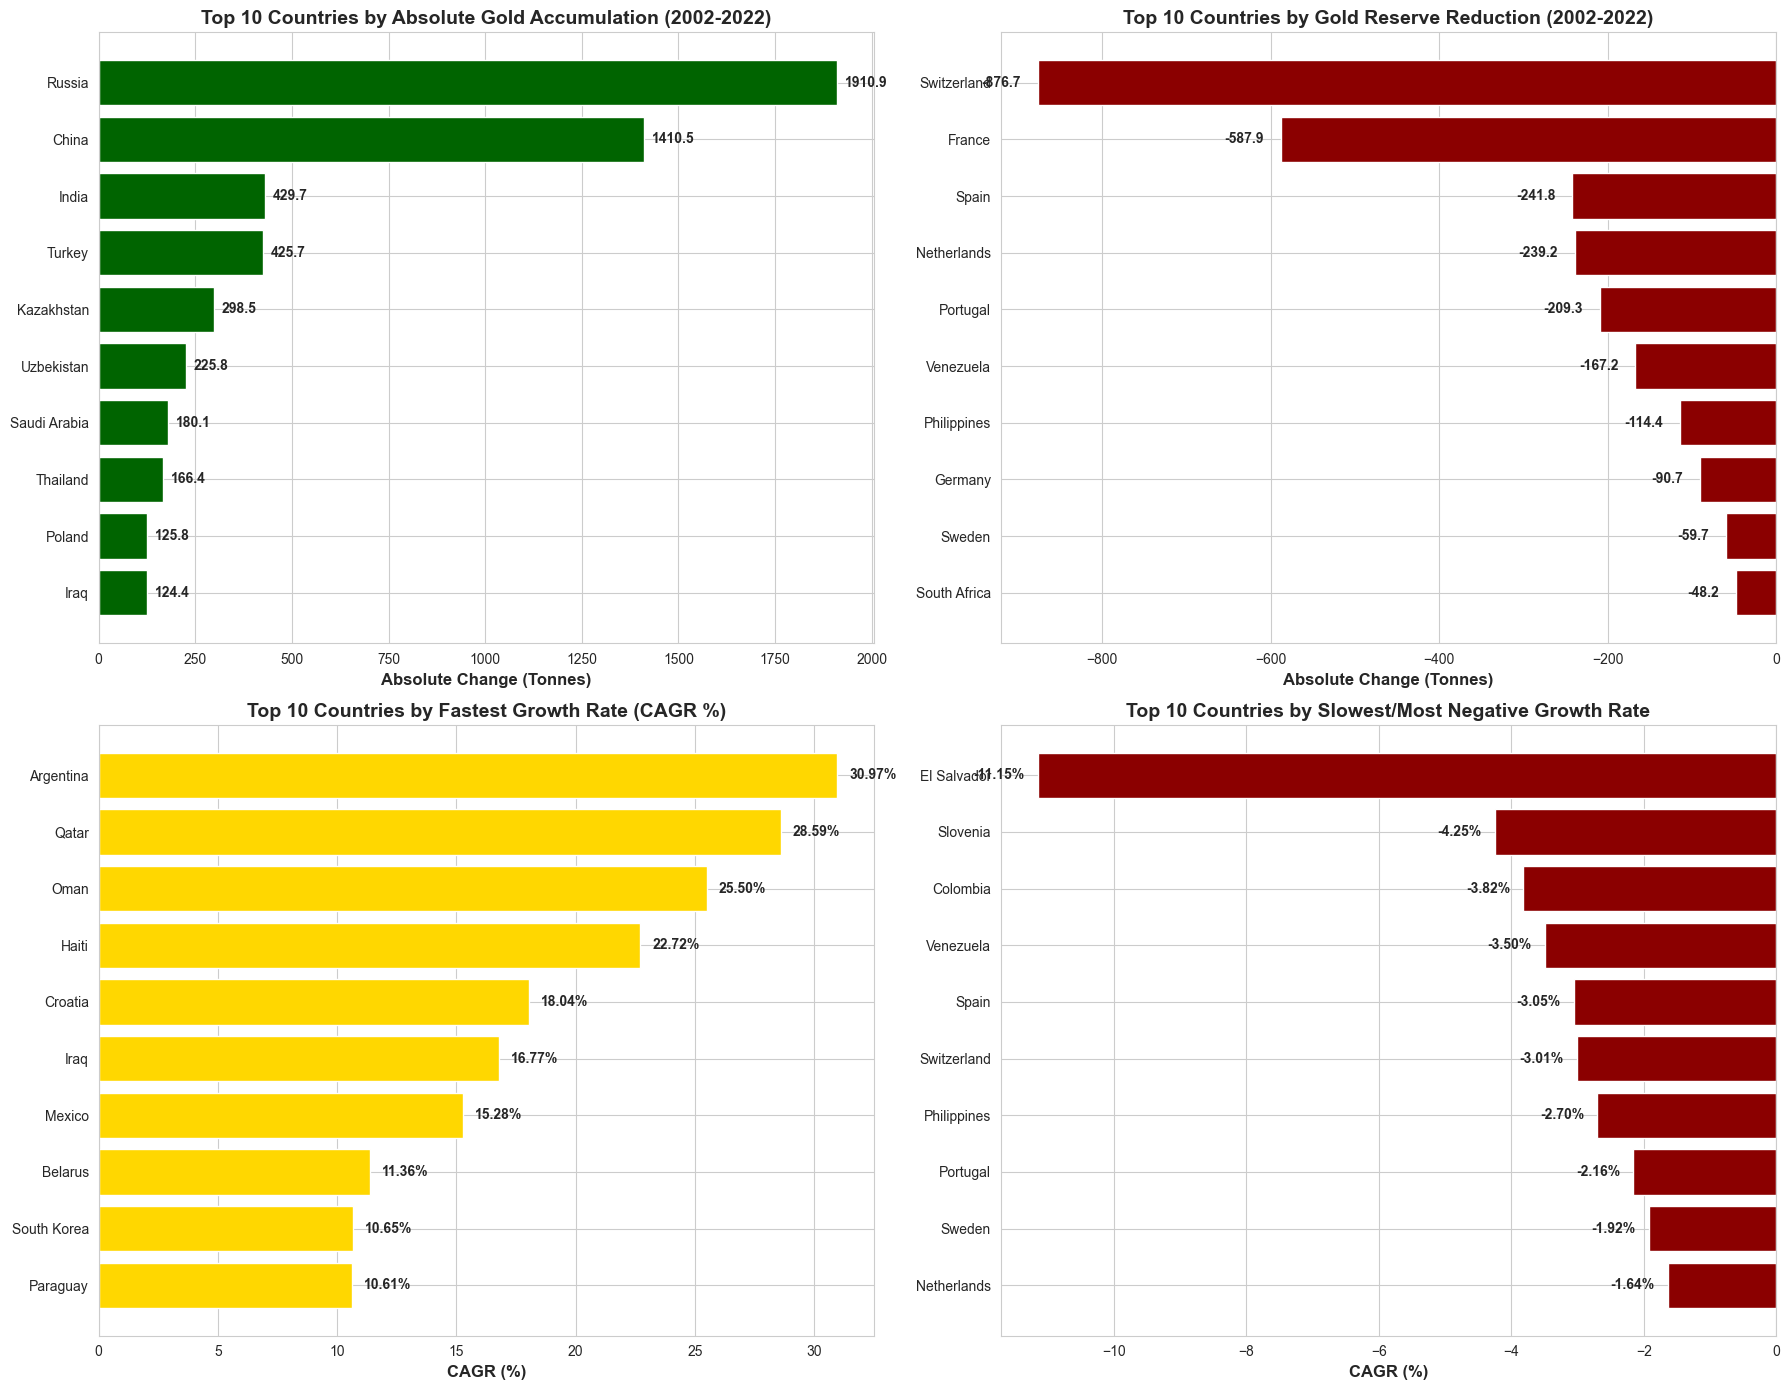


📊 Visualizations created successfully!


In [5]:
# Create visualizations for absolute accumulation and CAGR
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 10 by Absolute Accumulation
top_10_abs = df_metrics_sorted.head(10)
axes[0, 0].barh(top_10_abs['country'], top_10_abs['absolute_change'], color='darkgreen')
axes[0, 0].set_xlabel('Absolute Change (Tonnes)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Top 10 Countries by Absolute Gold Accumulation (2002-2022)', 
                      fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_10_abs['absolute_change']):
    axes[0, 0].text(v + 20, i, f'{v:.1f}', va='center', fontweight='bold')

# 2. Bottom 10 (Largest Reducers) by Absolute Change
bottom_10_abs = df_metrics_sorted.tail(10).sort_values('absolute_change')
axes[0, 1].barh(bottom_10_abs['country'], bottom_10_abs['absolute_change'], color='darkred')
axes[0, 1].set_xlabel('Absolute Change (Tonnes)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Top 10 Countries by Gold Reserve Reduction (2002-2022)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()
for i, v in enumerate(bottom_10_abs['absolute_change']):
    axes[0, 1].text(v - 20, i, f'{v:.1f}', va='center', ha='right', fontweight='bold')

# 3. Top 10 by CAGR (excluding infinite values)
df_cagr_finite = df_metrics[df_metrics['CAGR'] != float('inf')].sort_values('CAGR', ascending=False)
top_10_cagr = df_cagr_finite.head(10)
axes[1, 0].barh(top_10_cagr['country'], top_10_cagr['CAGR'], color='gold')
axes[1, 0].set_xlabel('CAGR (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 10 Countries by Fastest Growth Rate (CAGR %)', 
                     fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
for i, v in enumerate(top_10_cagr['CAGR']):
    axes[1, 0].text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')

# 4. Bottom 10 by CAGR (Most negative)
bottom_10_cagr = df_cagr_finite.tail(10).sort_values('CAGR')
axes[1, 1].barh(bottom_10_cagr['country'], bottom_10_cagr['CAGR'], color='darkred')
axes[1, 1].set_xlabel('CAGR (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Top 10 Countries by Slowest/Most Negative Growth Rate', 
                     fontsize=14, fontweight='bold')
axes[1, 1].invert_yaxis()
for i, v in enumerate(bottom_10_cagr['CAGR']):
    axes[1, 1].text(v - 0.2, i, f'{v:.2f}%', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Visualizations created successfully!")

## 🔍 Key Findings: Gold Reserve Accumulation Analysis (2002-2022)

### Fastest Accumulators by Absolute Volume
The analysis reveals **Russia** as the dominant accumulator in absolute terms, adding **1,910.88 tonnes** over 20 years with a CAGR of **9.31%**. This represents a nearly 500% increase from 387.65 to 2,298.53 tonnes. **China** follows with **1,410.54 tonnes** added (CAGR: 6.23%), demonstrating strategic reserve building by major emerging economies.

Other significant accumulators include:
- **India**: +429.68 tonnes (CAGR: 4.02%)
- **Turkey**: +425.70 tonnes (CAGR: 8.01%)
- **Kazakhstan**: +298.54 tonnes (CAGR: 9.91%)

### Fastest Accumulators by Growth Rate (CAGR)
When measured by relative growth rate, several smaller economies show explosive growth:
- **Argentina**: 30.97% CAGR (from 0.28 to 61.74 tonnes)
- **Qatar**: 28.59% CAGR (from 0.60 to 91.75 tonnes)
- **Oman**: 25.50% CAGR (from 0.02 to 1.88 tonnes)
- **Iraq**: 16.77% CAGR (from 5.87 to 130.32 tonnes)

These countries started from very low bases but show aggressive accumulation strategies relative to their starting positions.

### Slowest/Negative Accumulators
Several Western European countries significantly reduced their gold reserves:
- **Switzerland**: -876.68 tonnes (CAGR: -3.01%)
- **France**: -587.93 tonnes (CAGR: -1.07%)
- **Spain**: -241.82 tonnes (CAGR: -3.05%)
- **Netherlands**: -239.22 tonnes (CAGR: -1.64%)
- **Germany**: -90.66 tonnes (CAGR: -0.13%)

**El Salvador** shows the most negative growth rate at **-11.15% CAGR**, reducing reserves by over 90%.

### 📋 Summary
**Fastest by absolute volume**: Russia (+1,910.88 tonnes, 9.31% CAGR)  
**Fastest by growth rate**: Argentina (30.97% CAGR)  
**Slowest by growth rate**: El Salvador (-11.15% CAGR)  
**Largest reducer by volume**: Switzerland (-876.68 tonnes, -3.01% CAGR)

The data reveals a clear divergence: **emerging economies (Russia, China, India, Turkey, Kazakhstan) are aggressively accumulating** gold reserves, while **established Western European economies are reducing** their holdings, likely reflecting different monetary policy strategies and views on gold as a reserve asset.